In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import iplot
#plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

Importing Data

In [2]:
#read dataset
data=pd.read_csv('zomato.csv')
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.shape

(51717, 17)

In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
data.describe().style.background_gradient(cmap="Wistia")

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
#info() is used to check the Information about the data and the datatypes of each respective attribute.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Data Cleaning

In [7]:
len(data['name'].unique())

8792

In [8]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
feature_na=[feature for feature in data.columns if data[feature].isnull().sum()>0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [10]:
null = pd.DataFrame({'Null Values' : data.isnull().sum().sort_values(ascending=False), 'Percentage Null Values' : (data.isnull().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null.style.background_gradient(cmap="Wistia")

,Null Values,Percentage Null Values
dish_liked,28078,54.291626
rate,7775,15.033741
phone,1208,2.335789
approx_cost(for two people),346,0.669026
rest_type,227,0.438927
cuisines,45,0.087012
location,21,0.040606
listed_in(type),0,0.000000
menu_item,0,0.000000
reviews_list,0,0.000000


In [11]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
data.dropna(axis='index',subset=['rate'],inplace=True)

In [13]:
data.shape

(43942, 17)

In [14]:
def split(x):
    return x.split('/')[0]

In [15]:
data['rate']=data['rate'].apply(split)

In [16]:
data.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [17]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
data.replace('NEW',0,inplace=True)

In [19]:
data.replace('-',0,inplace=True)

In [20]:
data['rate']=data['rate'].astype(float)

Calculate Average Rating of each restaurant

In [21]:
data_rate=data.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.head(20).style.background_gradient(cmap="Wistia")

,restaurant,rating
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
5,11 to 11 Express Biriyanis,3.500000
6,1131 Bar + Kitchen,4.500000
7,12th Main - Grand Mercure,4.100000
8,1441 Pizzeria,4.100000
9,1522 - The Pub,4.212000


<Axes: xlabel='name'>

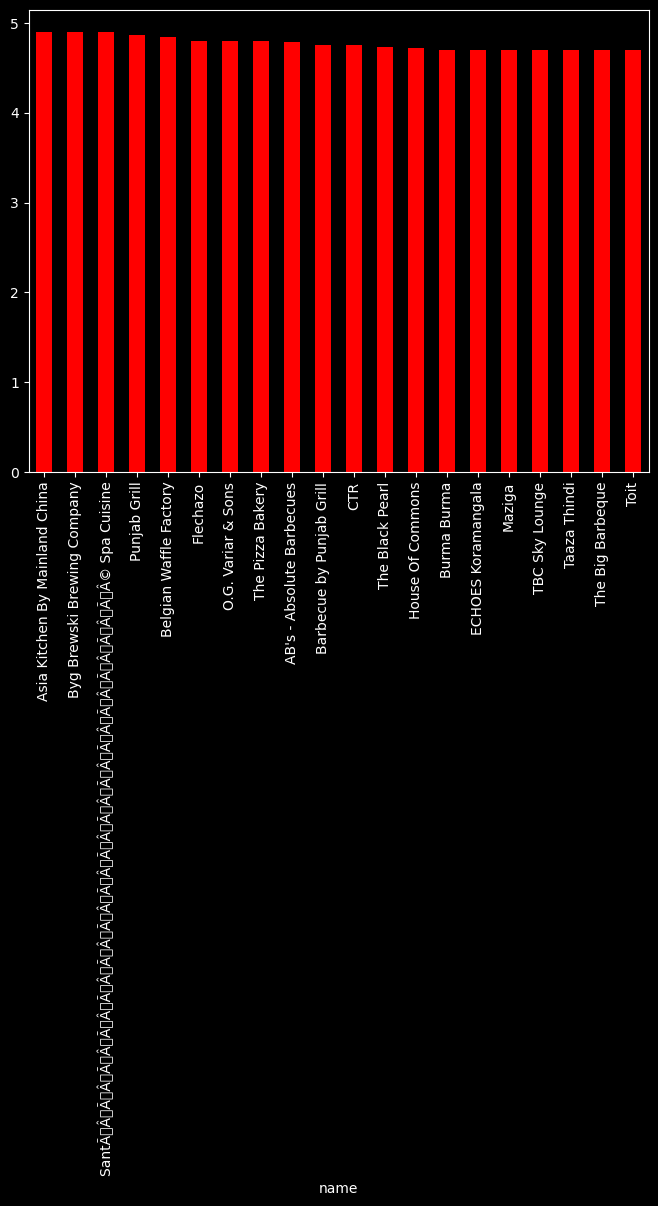

In [22]:
plt.figure(figsize=(8,6))
data.groupby('name')['rate'].mean().nlargest(20).plot.bar(color='red')

Get distribution of Rating column

<Axes: xlabel='rating', ylabel='Density'>

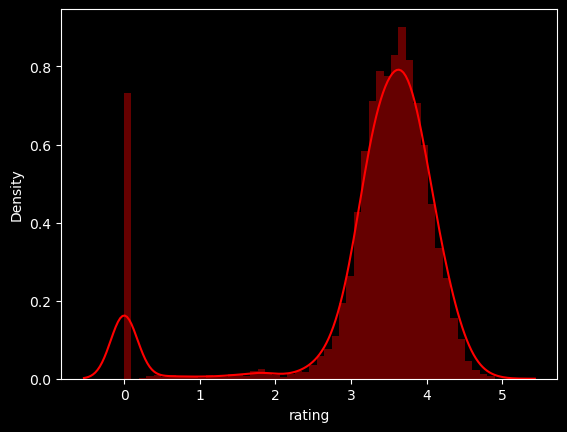

In [23]:
sns.set_style()
sns.distplot(data_rate['rating'] ,color='red')

Almost more than 50 percent of restaurants has rating between 3 and 4. Restaurants having rating more than 4.5 are very rare.

Top restaurant chains in Bengalore

Text(0.5, 0, 'Number of outlets')

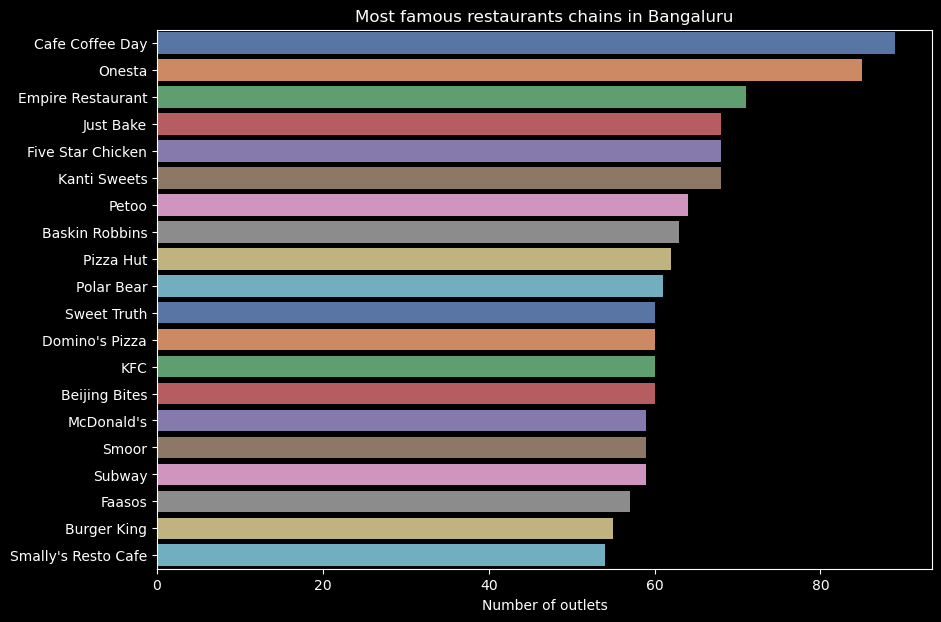

In [24]:
plt.figure(figsize=(10,7))
chains=data['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets") 

How many of the restaurant do not accept online orders?

In [25]:
x=data['online_order'].value_counts()
labels=['accepted','not accepted']

In [26]:
fig = px.pie(data, values=x, names=labels,title='Pie chart' ,template = 'plotly_dark')
fig.show()

What is the ratio b/w restaurants that provide and do not provide table booking?

In [27]:
x=data['book_table'].value_counts()
labels=['not book','book']

In [28]:
fig = px.pie(data, values=x, names=labels,title='Pie chart' ,template = 'plotly_dark')
fig.show()

How many types of restaurants we have?

In [29]:
data['rest_type'].isna().sum()

151

In [30]:
data['rest_type'].dropna(inplace=True)

In [31]:
data['rest_type'].isna().sum()

151

In [32]:
len(data['rest_type'].unique())

88

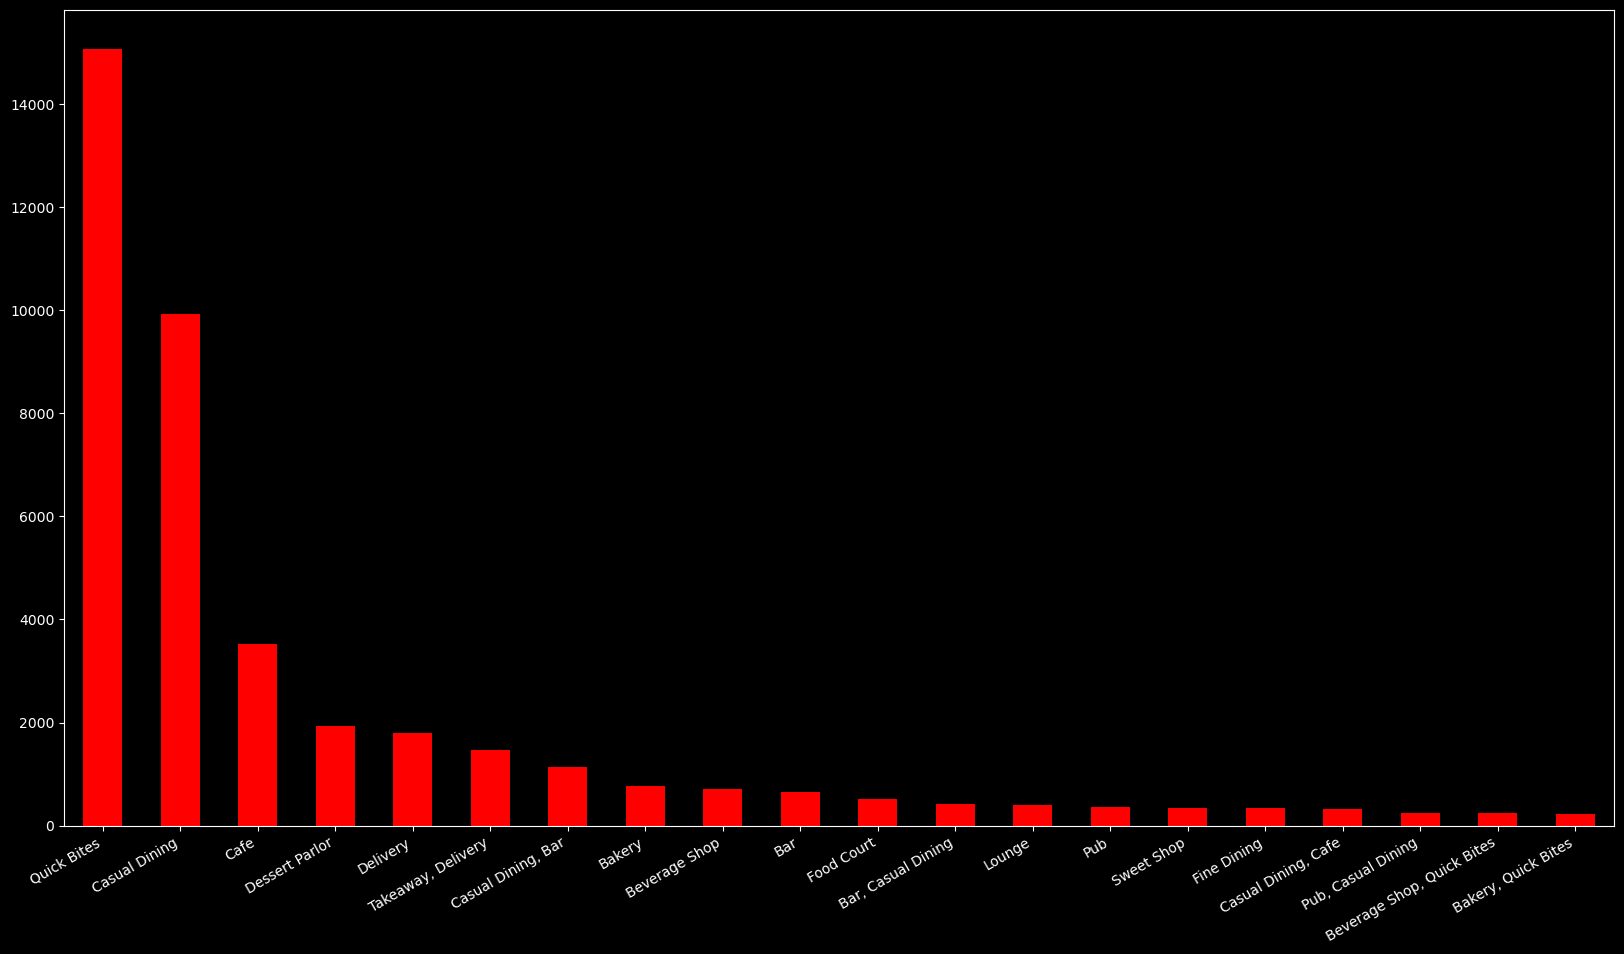

In [33]:
plt.figure(figsize=(20,12))
data['rest_type'].value_counts().nlargest(20).plot.bar(color='red')
plt.gcf().autofmt_xdate()

At all, Banglore is known as the tech capital of India, people having busy and modern life will prefer Quick Bites.

Highest voted restaurant

<Axes: xlabel='name'>

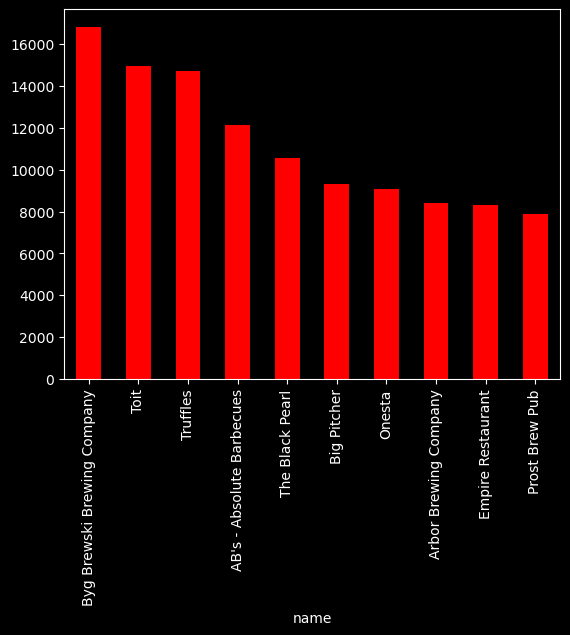

In [34]:
data.groupby('name')['votes'].max().nlargest(10).plot.bar(color='red')

Total restaurants at different locations of Bengalore

In [35]:
data.groupby('location')['name'].unique()

location
BTM                  [Sankranthi Veg Restaurant, Hearts Unlock Cafe...
Banashankari         [Jalsa, Spice Elephant, San Churro Cafe, Addhu...
Banaswadi            [Cafe Nibras, The Sanctuary, Crunch Pizzas, Pi...
Bannerghatta Road    [Deja Vu Resto Bar, Fattoush, Empire Restauran...
Basavanagudi         [Grand Village, Timepass Dinner, Srinathji's C...
                                           ...                        
West Bangalore       [FreshMenu, Fit Dish Fetish, Garden City Mobil...
Whitefield           [Imperio Cafe, Night Diaries, LocalHost, AB's ...
Wilson Garden        [Tree Top, Sahana's (Nati Style), Karavali Kol...
Yelahanka            [Prashanth Naati Corner, Cheta's Kitchen, Twis...
Yeshwantpur          [Chef's Bank, New Agarwal Bhavan, Fishing Boat...
Name: name, Length: 92, dtype: object

In [36]:
restaurant=[]
location=[]
for key,location_df in data.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [37]:
df_total=pd.DataFrame(zip(location,restaurant))
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
Bellandur,284
Jayanagar,311
Bannerghatta Road,362
JP Nagar,400
Indiranagar,467
Electronic City,518
Marathahalli,525
HSR,553
BTM,581


<Axes: xlabel='location'>

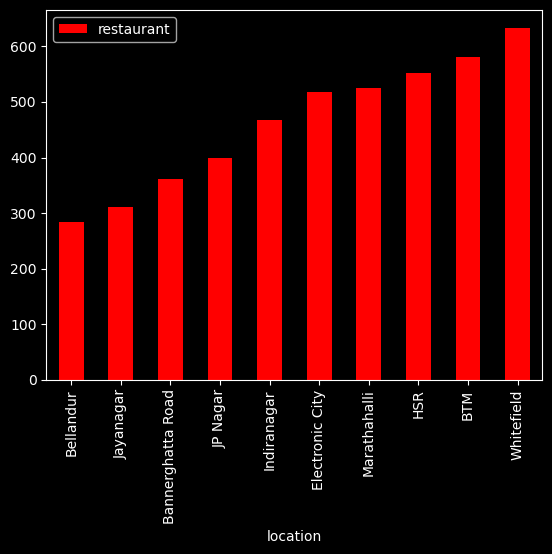

In [38]:
df_total.sort_values(by='restaurant').tail(10).plot.bar(color='red')

Total number of variety of restaurants ie north indian,south Indian

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

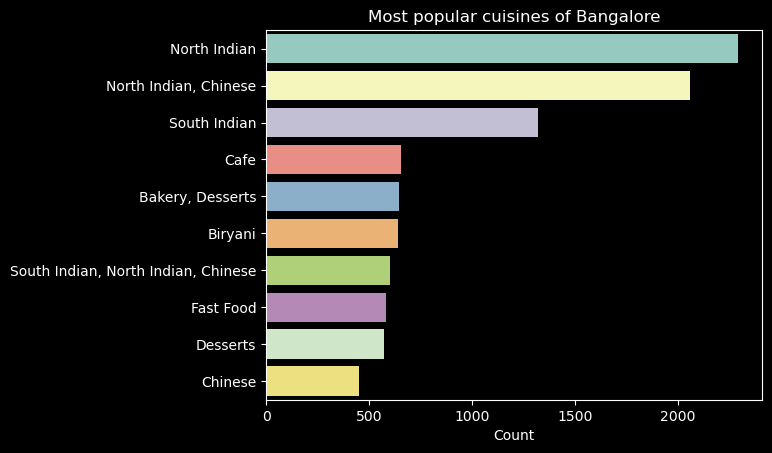

In [40]:
cuisines = data['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines, y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

We can observe that North Indian,chinese,South Indian and Biriyani are most common.

It means Bengalore is more influenced by North Indian culture more than South.

Analyse Approx cost for 2 people.

In [41]:
data['approx_cost(for two people)'].isna().sum()

252

In [42]:
data.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [43]:
data['approx_cost(for two people)'].isna().sum()

0

In [44]:
len(data['approx_cost(for two people)'].value_counts())

66

In [45]:
data['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [46]:
data['approx_cost(for two people)'].dtype

dtype('O')

In [47]:
data['approx_cost(for two people)'] = data['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [48]:
data['approx_cost(for two people)']=data['approx_cost(for two people)'].astype(int)

In [49]:
data['approx_cost(for two people)'].dtype

dtype('int32')

Cost vs Rating

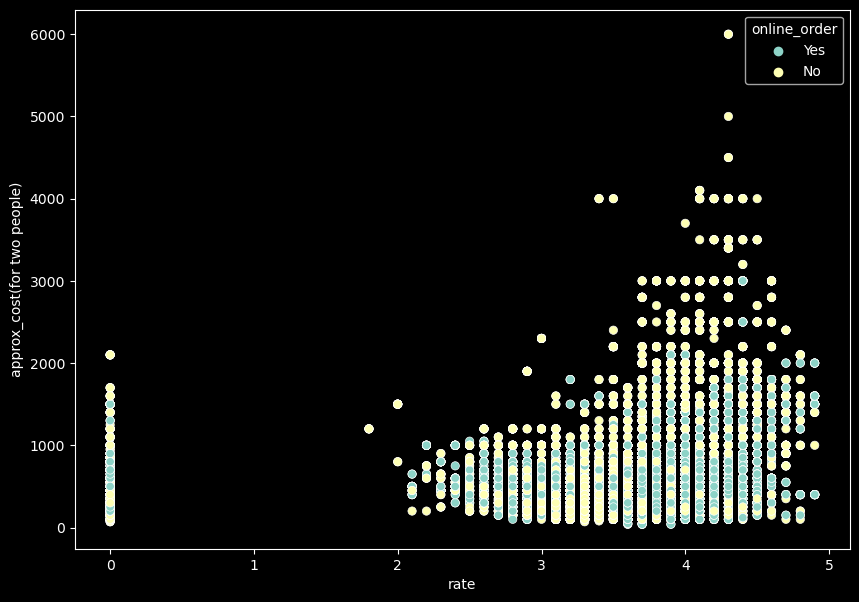

In [50]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=data)
plt.show()

From this scattterplot,we can come up with a conclusion ya most of the highest rated accepts online order and they r budgeted too

Is there any difference b/w votes of restaurants accepting and not accepting online orders?

<Axes: xlabel='online_order', ylabel='votes'>

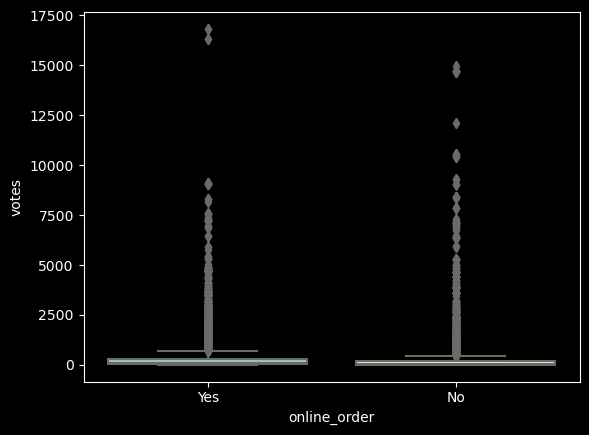

In [51]:
sns.boxplot(x='online_order',y='votes',data=data)

* from this boxplot,we can observe that median number of votes for both categories vary.

* Restaurants accepting online orders get more votes from customers as there is a rating option poping up after each order through zomato application.

Is there any difference b/w price of restaurants accepting and not accepting online orders?

<Axes: xlabel='online_order', ylabel='approx_cost(for two people)'>

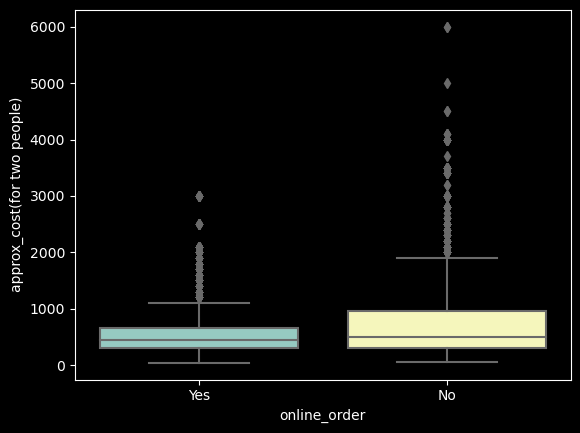

In [52]:
sns.boxplot(x='online_order',y='approx_cost(for two people)',data=data)

Restaurants accepting online orders are more affordable than Restaurants who are accepting online orders.

In [53]:
data['approx_cost(for two people)'].max()

6000

In [54]:
data['approx_cost(for two people)'].min()

40

In [55]:
data[data['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

Distribution of cost for 2 people

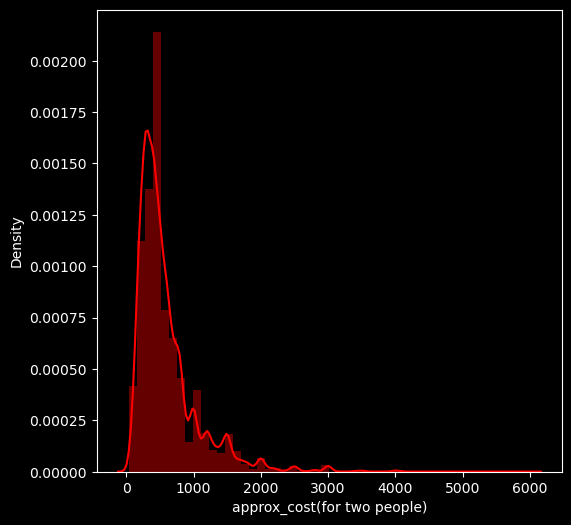

In [56]:
plt.figure(figsize=(6,6))
sns.distplot(data['approx_cost(for two people)'] ,color='red')
plt.show()

<Axes: >

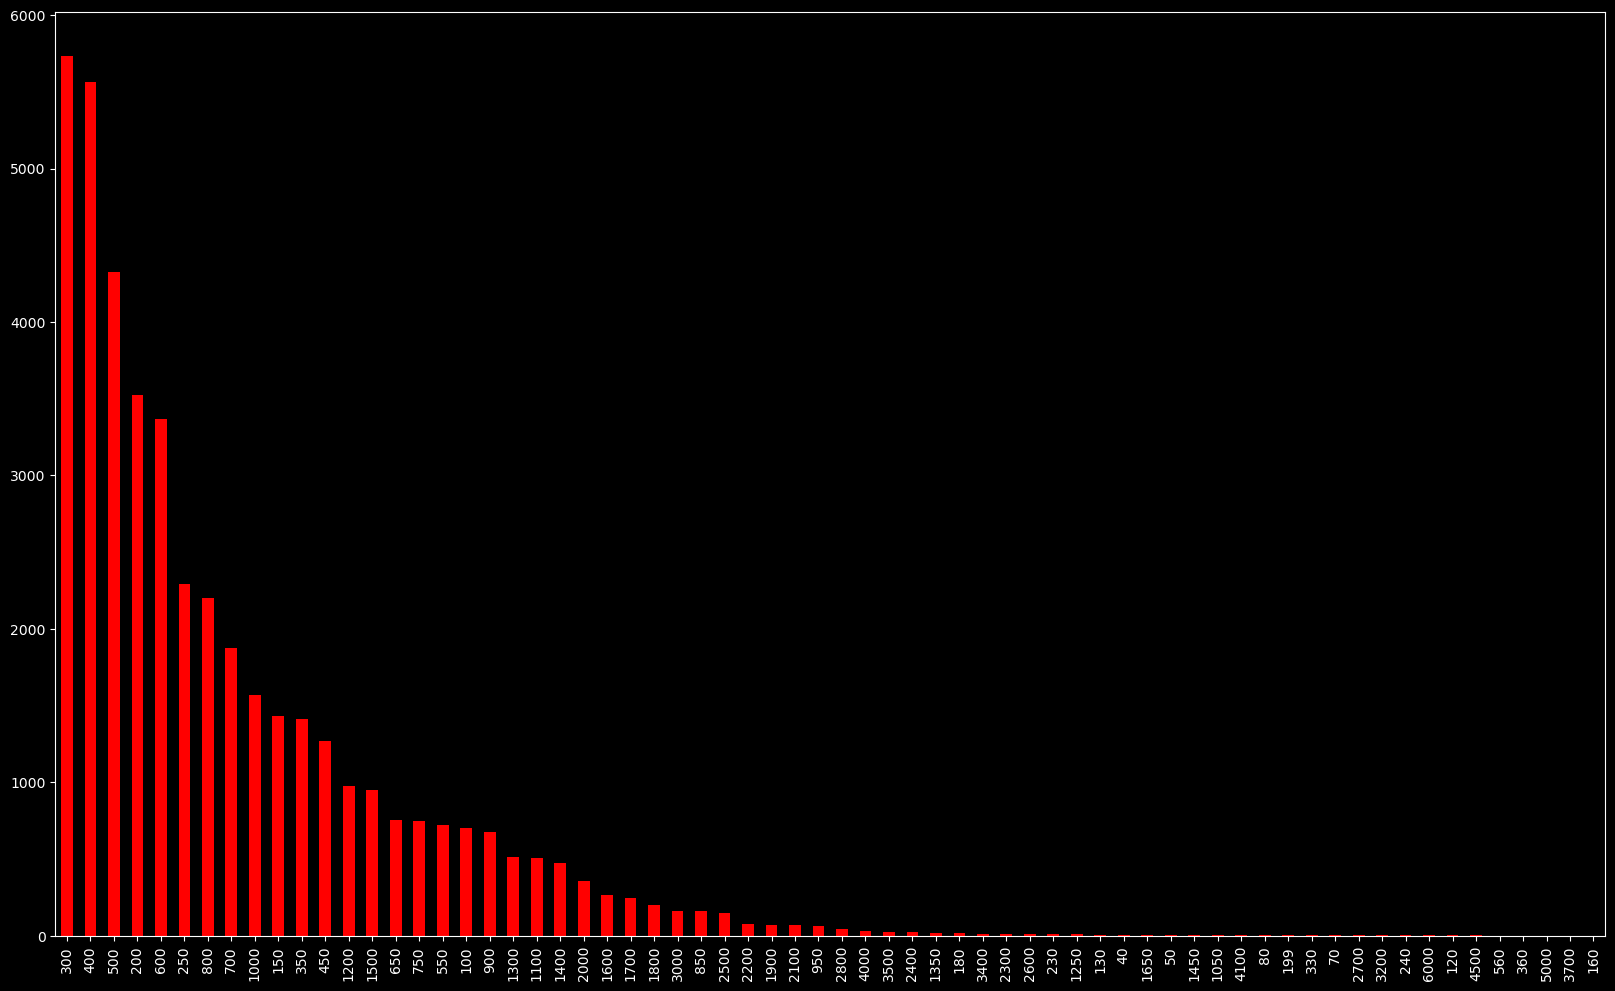

In [57]:
plt.figure(figsize=(20,12))
data['approx_cost(for two people)'].value_counts().plot.bar(color='red')

most of the price lies between in a range of under 1000,it means most are affordable & very few are luxurious.

In [58]:
data_1=data.copy()

Most costly Rate for 2 people is served at which Restaurant what exactly is the dish involved in this and liked dish of that restaurant?

In [59]:
data_1[data_1['approx_cost(for two people)']==6000][['name','cuisines','dish_liked']]

,name,cuisines,dish_liked
19139,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."
45618,Le Cirque Signature - The Leela Palace,"French, Italian","Wine, Asparagus Soup, Creme Brulee, Pasta, Rav..."


In [60]:
data_1.set_index('name',inplace=True)

In [61]:
data_1.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Top 10 Most Expensive restaurant with approx cost for 2 people

<Axes: xlabel='name'>

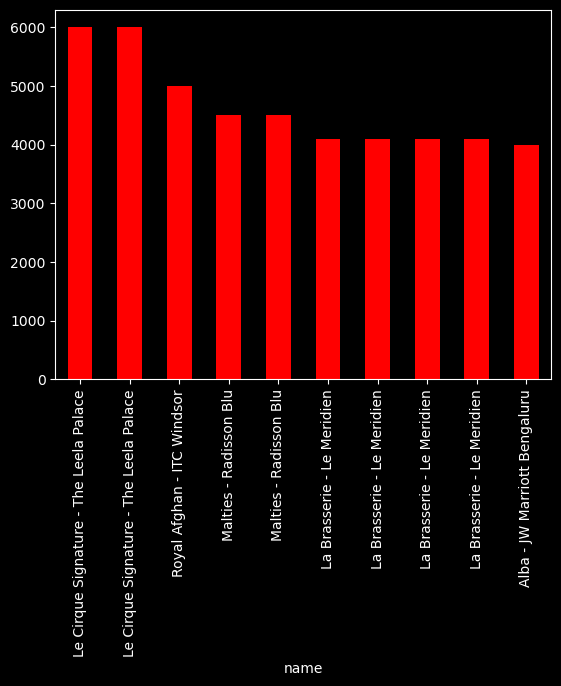

In [62]:
data_1['approx_cost(for two people)'].nlargest(10).plot.bar(color='red')

Top 10 Cheapest restaurant with approx cost for 2 people

<Axes: xlabel='name'>

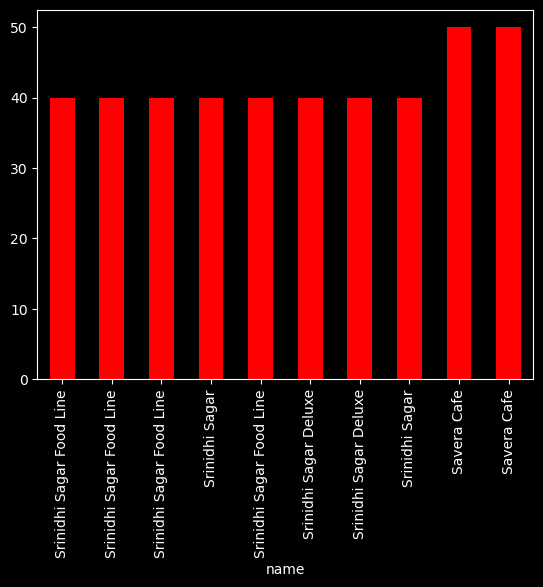

In [63]:
data_1['approx_cost(for two people)'].nsmallest(10).plot.bar(color='red')

All the restautant that are below than 500(budget hotel)

In [64]:
data_1.set_index('location',inplace=True)

In [65]:
data_1[data_1['approx_cost(for two people)']<=500]

,url,address,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,
Banashankari,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7,88,+91 9620009302,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",Yes,No,4.1,402,080 26724489\r\n+91 7406048982,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/the-coffee-sh...,"6th Block, 3rd Stage, Banashankari, Bangalore",Yes,Yes,4.2,164,+91 9731644212,Cafe,"Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...","Cafe, Chinese, Continental, Italian",500,"[('Rated 4.0', ""RATED\n Food - 4/5\nAmbience ...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/caf-eleven-ba...,"111, Sapphire Toys Building, 100 Feet Ring Roa...",No,No,4.0,424,080 49577715,Cafe,"Sandwich, Omelette, Ice Tea, Virgin Mojito, Ho...","Cafe, Continental",450,"[('Rated 2.0', ""RATED\n This is a hookah cafe...",[],Cafes,Banashankari
Banashankari,https://www.zomato.com/bangalore/t3h-cafe-bana...,"504, CJ Venkata Das Road, Padmanabhangar, 2nd ...",No,No,3.9,93,+91 8884726600,Cafe,"Cheese Maggi, Peri Peri Fries, Pasta Arrabiata","Cafe, Italian, American",300,"[('Rated 4.0', ""RATED\n Happy to see such a c...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brookefield,https://www.zomato.com/bangalore/venice-kerala...,"Opposite Brookfield Mall, Shiva Temple Road, B...",No,No,3.7,34,+91 8880059495,Quick Bites,NaN,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",[],Dine-out,Whitefield
KR Puram,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",No,No,3.4,7,+91 9206260085\n+91 7619416923,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
Brookefield,https://www.zomato.com/bangalore/the-crunch-br...,"33/1, Kundalahalli Road, Brookefield, Bangalore",No,No,3.3,6,+91 9016277963,Beverage Shop,NaN,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",[],Dine-out,Whitefield


In [66]:
df_budget=data_1[data_1['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head().tail(10).style.background_gradient(cmap="Wistia")

,location,approx_cost(for two people)
0,Banashankari,300
1,Banashankari,500
2,Banashankari,500
3,Banashankari,450
4,Banashankari,300


<Axes: >

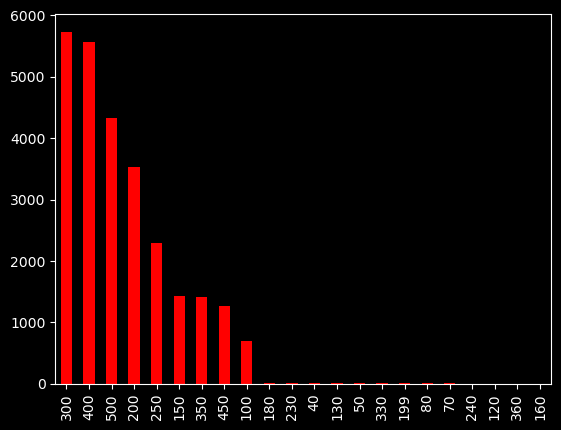

In [67]:
df_budget['approx_cost(for two people)'].value_counts().plot.bar(color='red')

we can conclude that 300 and 400 cost dishes are maximum in count.

Restaurants that have better rating >4 and that are under budget too

In [68]:
data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)].shape

(4007, 17)

Total numbers of Restaurants that have better rating >4 and that are under budget too ie less than 500

In [69]:
df_new=data[(data['rate']>=4) & (data['approx_cost(for two people)']<=500)]
len(df_new['name'].unique())

628

Total such various affordable hotels at different location

In [70]:
location=[]
total=[]
for loc,location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))

In [71]:
len(location)

68

In [72]:
len(total)

68

In [73]:
location_df=pd.DataFrame(zip(location,total))
location_df.columns=['location','restaurant']
location_df.set_index('location',inplace=True)

In [74]:
location_df.head(20).tail(10).style.background_gradient(cmap="Wistia")

,restaurant
location,
City Market,1
Commercial Street,4
Cunningham Road,4
Domlur,5
Ejipura,1
Electronic City,23
Frazer Town,15
HBR Layout,3
HSR,58


Text(0, 0.5, 'Total restaurants')

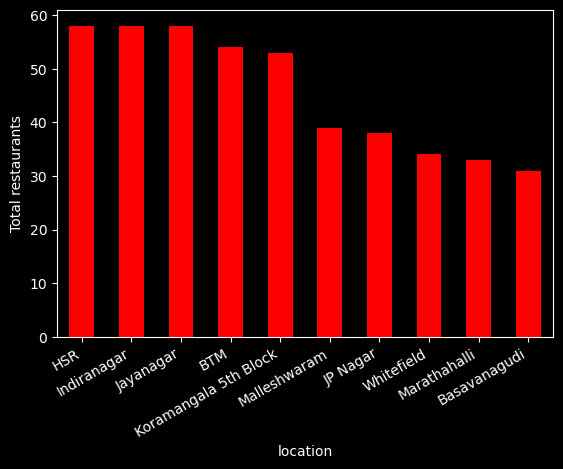

In [75]:
location_df['restaurant'].nlargest(10).plot.bar(color='red')
plt.gcf().autofmt_xdate()
plt.ylabel('Total restaurants')

Which are the foodie areas?

<Axes: xlabel='location'>

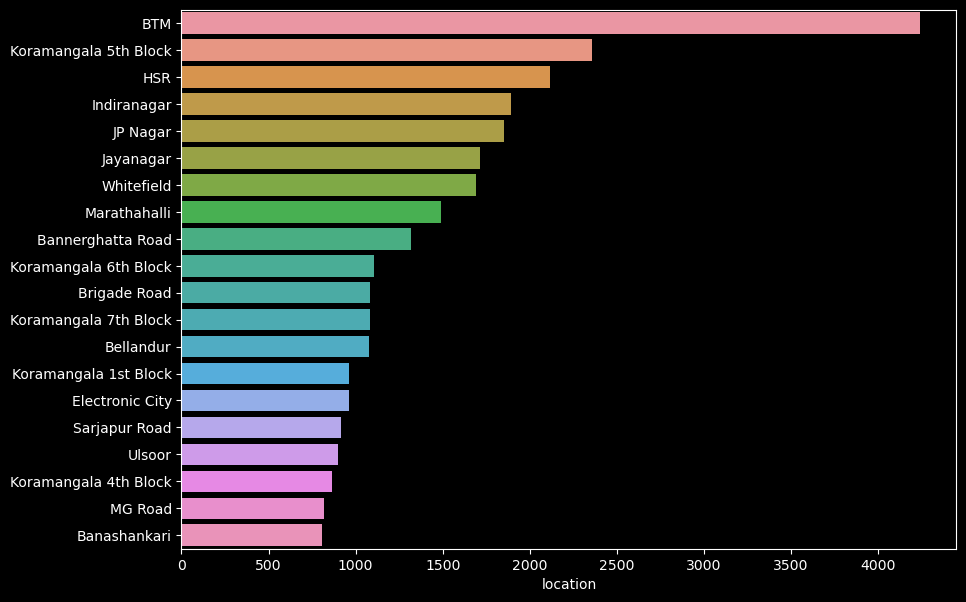

In [77]:
plt.figure(figsize=(10,7))
Restaurant_locations = data['location'].value_counts()[:20]
sns.barplot(x=Restaurant_locations, y=Restaurant_locations.index)

* We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.

* BTM dominates the section by having more than 5000 restaurants.

Geographical Analysis

I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy

In [78]:
data.shape

(43690, 17)

In [79]:
len(data['location'].unique())

92

In [80]:
locations=pd.DataFrame({"Name":data['location'].unique()})

In [81]:
locations['new_Name']='Bangalore '+locations['Name']

In [82]:
locations.head()

,Name,new_Name
0,Banashankari,Bangalore Banashankari
1,Basavanagudi,Bangalore Basavanagudi
2,Mysore Road,Bangalore Mysore Road
3,Jayanagar,Bangalore Jayanagar
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout


In [84]:
!pip install geopy

     -------------------------------------- 125.4/125.4 kB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00


In [85]:
from geopy.geocoders import Nominatim

In [86]:
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)

In [87]:
locations['geo_loc']=lat_lon

In [88]:
locations.head()

,Name,new_Name,geo_loc
0,Banashankari,Bangalore Banashankari,"(15.8876779, 75.7046777)"
1,Basavanagudi,Bangalore Basavanagudi,"(13.8345913, 75.7339359)"
2,Mysore Road,Bangalore Mysore Road,"(12.9466619, 77.5300896)"
3,Jayanagar,Bangalore Jayanagar,"(27.3493013, 95.3159407)"
4,Kumaraswamy Layout,Bangalore Kumaraswamy Layout,"(12.9081487, 77.5553179)"


We have found out latitude and longitude of each location listed in the dataset using geopy.

In [89]:
Rest_locations=pd.DataFrame(data['location'].value_counts().reset_index())

In [90]:
Rest_locations.columns=['Name','count']
Rest_locations.head().style.background_gradient(cmap="Wistia")

,Name,count
0,BTM,4237
1,Koramangala 5th Block,2358
2,HSR,2113
3,Indiranagar,1892
4,JP Nagar,1849


In [91]:
locations.shape

(92, 3)

In [92]:
Rest_locations.shape

(92, 2)

In [93]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,new_Name,geo_loc
0,BTM,4237,Bangalore BTM,"(12.911275849999999, 77.60456543431182)"
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)"
2,HSR,2113,Bangalore HSR,"(29.1523467, 75.7245798)"
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)"
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)"


In [94]:
Restaurant_locations.shape

(91, 4)

In [95]:
type(Restaurant_locations['geo_loc'][0])

tuple

In [96]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [97]:
np.array(Restaurant_locations['geo_loc'])

array([(12.911275849999999, 77.60456543431182), (12.9348429, 77.6189768),
       (29.1523467, 75.7245798), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.3493013, 95.3159407),
       (53.5533682, -2.2969019), (12.9552572, 77.6984163),
       (12.9320229, 77.6007452), (12.9390255, 77.6238477),
       (40.28745, -76.964526), (12.9364846, 77.6134783),
       (12.93103185, 77.6782471), (12.9277245, 77.6327822),
       (12.848759900000001, 77.64825295827616), (12.9244812, 77.6503058),
       (12.9778793, 77.6246697), (12.9327778, 77.6294052),
       (12.9755264, 77.6067902), (15.8876779, 75.7046777),
       (19.1602288, 76.2772822), (13.0027353, 77.5703253),
       (13.8345913, 75.7339359), (40.5973154, -74.0929447),
       (5.4166331, 100.3085493), (33.5935063, -79.0345627),
       (12.9986827, 77.615525), (40.7596221, -73.5780855),
       (13.0093455, 77.6377094), (13.0375538, 77.565566),
       (38.5041109, -122.7586448), (13.0141618, 77.6518539),
       (12.9882338, 77.5

In [98]:
#### unzip it
lat,lon=zip(*np.array(Restaurant_locations['geo_loc']))

In [99]:
type(lat)

tuple

In [100]:
Restaurant_locations['lat']=lat
Restaurant_locations['lon']=lon

In [101]:
Restaurant_locations.head().style.background_gradient(cmap="Wistia")

,Name,count,new_Name,geo_loc,lat,lon
0,BTM,4237,Bangalore BTM,"(12.911275849999999, 77.60456543431182)",12.911276,77.604565
1,Koramangala 5th Block,2358,Bangalore Koramangala 5th Block,"(12.9348429, 77.6189768)",12.934843,77.618977
2,HSR,2113,Bangalore HSR,"(29.1523467, 75.7245798)",29.152347,75.724580
3,Indiranagar,1892,Bangalore Indiranagar,"(12.9732913, 77.6404672)",12.973291,77.640467
4,JP Nagar,1849,Bangalore JP Nagar,"(12.2655944, 76.6465404)",12.265594,76.646540


In [103]:
!pip install folium

     -------------------------------------- 100.3/100.3 kB 2.9 MB/s eta 0:00:00


In [104]:
import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

In [105]:
basemap

In [106]:
Restaurant_locations[['lat','lon','count']].values.tolist()

[[12.911275849999999, 77.60456543431182, 4237.0],
 [12.9348429, 77.6189768, 2358.0],
 [29.1523467, 75.7245798, 2113.0],
 [12.9732913, 77.6404672, 1892.0],
 [12.2655944, 76.6465404, 1849.0],
 [27.3493013, 95.3159407, 1711.0],
 [53.5533682, -2.2969019, 1688.0],
 [12.9552572, 77.6984163, 1488.0],
 [12.9320229, 77.6007452, 1318.0],
 [12.9390255, 77.6238477, 1103.0],
 [40.28745, -76.964526, 1084.0],
 [12.9364846, 77.6134783, 1084.0],
 [12.93103185, 77.6782471, 1078.0],
 [12.9277245, 77.6327822, 964.0],
 [12.848759900000001, 77.64825295827616, 963.0],
 [12.9244812, 77.6503058, 913.0],
 [12.9778793, 77.6246697, 901.0],
 [12.9327778, 77.6294052, 864.0],
 [12.9755264, 77.6067902, 818.0],
 [15.8876779, 75.7046777, 805.0],
 [19.1602288, 76.2772822, 745.0],
 [13.0027353, 77.5703253, 657.0],
 [13.8345913, 75.7339359, 628.0],
 [40.5973154, -74.0929447, 626.0],
 [5.4166331, 100.3085493, 607.0],
 [33.5935063, -79.0345627, 579.0],
 [12.9986827, 77.615525, 574.0],
 [40.7596221, -73.5780855, 550.0],
 [13

In [107]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [108]:
basemap

* It is clear that restaurants tend to concentrate in central bangalore area.

* The clutter of restaurants lowers are we move away from central.

* So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.